Md Shahidullah Kawsar, Data Scientist, IDARE, Houston, TX

<br>**Motivation for this project:**
<br>I bought used car 3 times. There's a lot of bargain occurred during the resale process. This bargain happens based on the individual customer's car usage experience and the smartness of the seller. I felt disappointed a couple of times and sellers also refused to sell the car thinking about the profit a lot. 
<br>
<br>Rather than relying on only personal experience, a machine learning model can estimate the best price for both - the seller and the customer. For example, if you go to the Facebook Marketplace to buy a used car, it will show an estimated value of the similar cars which helps the customer to make the deal. But if you visit Craiglist, you won't get any estimated price suggestions for the similar used car. Not all platforms provide this opportunity to compare the car price before selling or buying.

**Goal of the project**
1. Find the important features to predict the resale price of BMW used cars
2. Design a best supervised regression model to predict the resale price with lowest prediction error and evaluate the machine learning model performance with 3 key performance indicators such as Mean Absolute Error (MAE), Root-Mean Squared Error (RMSE) and coefficient of determination (R-squared).

As I will predict the resale price which are continuous values, and I already have the target column for the training, that means I am dealing with a supervised regression problem. Here, the key performance indicators are:
<br>MAE represents the expected value of the absolute error loss. MAE Lower is better.
<br>RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far the regression line data points are. RMSE tells us how concentrated the data is around the line of best fit. RMSE lower is better.
<br> R-squared provides a measure of how well future samples are likely to be predicted by the model. The value of R-squared ranges from 0 to 1. Close to 1 is better.

<br>**Analysis plan to problem solving:**

The following steps have been followed to achieve the goal of this project.

**Exploratory Data Analysis**
1. Reading the data as Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Exploring the data using:
    2. Barplots
    3. Distribution
    5. Scatterplot and linear regression analysis
    6. Correlation heatmap

**Data preprocessing:**
1. Outlier Removal
2. Data Transformation
3. One-hot encoding

**Machine Learning** 
1. Linear Regression
5. Extreme Gradient Boosting (Training with 5 fold cross-validation and grid search)

**Comparison of the Key performance Indicators between the training and the test set:**
1. Mean Absolute Error
2. Root Mean Squared Error
3. R squared

**Prediction analysis:**
1. Comparison of actual and predicted value
2. Feature importance

### Importing libraries and packages

In [1]:
# import the data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting data into random train and test subsets
from sklearn.model_selection import train_test_split

# for feature selection
from sklearn.feature_selection import VarianceThreshold

# for statistical model
import statsmodels.api as sm

# for machine learning
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# GridSearchCV: to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# to save the models
import pickle

# importing packages for data standardization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to check the runtime
import time

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

#### Read the bmw dataset from the csv file

In [46]:
df = pd.read_csv("bmw.csv")

# lets check the first five rows of the dataset
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


#### Given Feature variables:
**model**: categories of the bmw car
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders

#### Target Variable:
**price**: selling price of the car

In [47]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None

Number of observations (rows) = 10781
<br>Number of columns = 9 (8 feature variables and 1 target variable)
<br>Number of categorical variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, mileage, tax, mpg, engineSize
<br>The dataset has no missing values

#### Assumption:
- Car Price is in \\$
- Road tax is in \\$
- engineSize is in Litre

#### Questions in mind:
- What's the oldest and latest car in this dataset?
- What's the average price of each car?
- What's the range of car prices, road taxes and engine sizes?
- What's the highest mpg of a bmw car?
- What's the highest and lowest mileage of the given bmw used cars?

In [4]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


#### Observations:
- The oldest car in the dataset is from 1996
- The latest car is from 2020
- The average price of each used car is \\$22733
- The most expensive car price is \\$123456 and the cheapest car price is \\$1200
- Road tax varies from \\$0 to \\$580 per car
- The highest mpg is 470.8, which is quite large and requires further investigation
- Engine Size varies from 0 to 6.6L
- The lowest mileage is 1 mile and highest mileage is 214000 miles


#### Questions in mind:
- What BMW models are available in this dataset?
- What's the transmission type of these cars?
- What type of fuel BMW cars use and which type of fuel are the most popular?

In [5]:
# statistics of the object variables
display(df.describe(include='object'))

# print the name of the unique models
print("models : ", df['model'].unique())

# print the unique transmission systems 
print("transmission : ", df['transmission'].unique())

# print the unique fuelTypes 
print("fuelType : ", df['fuelType'].unique())

,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


models :  [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
transmission :  ['Automatic' 'Manual' 'Semi-Auto']
fuelType :  ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


#### Observations:
- There are 24 unique models of bmw cars. Among them '3 series' cars appeared most 2443 samples
- There are 3 different transmission system available. Among them, highest 4666 cars have semi-auto transmission
- 7027 cars run by diesel. There are 5 different types of fuel type present in the dataset

### Data Exploration using plots and graphs

### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

**Questions in mind:**
<br>Based on model, transmission and fuelType,
- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

In [6]:
def barplot_(col):
    '''
    This function finds the percentage of cars, average and total selling price by each category
    Args:
        col (str): categorical feature
    Returns:
        3 images of barplot
    '''
    # group the dataset by col and find the number of cars in each category, 
    # average selling price and total selling price 
    data = df.groupby(col)[['price']].agg(['count', 'mean', 'sum']).round(2)

    # reset the index
    data = data.reset_index()

    # sort the dataframe based on the 'count':number of cars in each category
    data = data.sort_values(by=('price','sum'), ascending=False)

    # convert the total selling price from $ to million $
    data[('price','sum')] = data[('price','sum')]/1000000

    # convert the number of cars to percentage of cars in each category
    data[('price','count')] = data[('price','count')]/100
    # display(data)

    plt.figure(figsize=(20,8))

    # count
    plt.subplot(1,3,1)
    sns.barplot(y=col, x=('price','count'), data=data, orient='h', color='blue', alpha=0.75)
    plt.title("Percentage of cars in each " + str(col))
    plt.xlabel("% of cars")
    plt.ylabel(col)

    # mean
    plt.subplot(1,3,2)
    sns.barplot(y=col, x=('price','mean'), data=data, orient='h', color='green', alpha=0.75)
    plt.title("Average selling price of each car by " + str(col))
    plt.xlabel("Average selling price ($)")
    plt.ylabel("")

    # sum
    plt.subplot(1,3,3)
    sns.barplot(y=col, x=('price','sum'), data=data, orient='h', color='orange')
    plt.title("Total selling price of each " + str(col))
    plt.xlabel("Total selling price ($ millions)")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

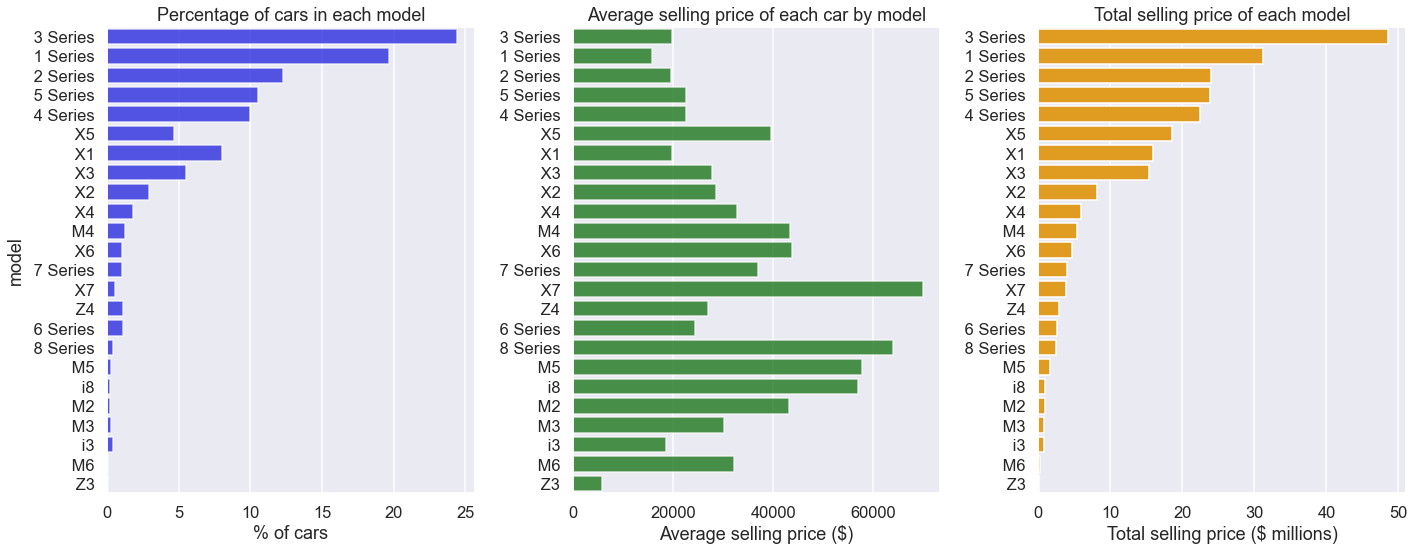

In [7]:
### Barplot: Percentage of cars, Average and Total selling price of cars by model
barplot_('model')

#### Observations:
- Top 5 selling car models are 3 Series (24.4%), 1 Series (19.7%), 2 Series (12.3%), 5 Series (10.6%) and 4 Series (10%)
- Top 5 average selling price car models are X7 (\\$69,842), 8 Series (\\$63,997), M5 (\\$57,760), i8 (\\$57,012), and X6 (\\$43,838)
- Top 5 total selling price car models are 3 Series (\\$48.6M), 1 Series (\\$31.2M), 2 Series (\\$24M), 5 Series (\\$23.8M) and 4 Series (\\$22.4M)

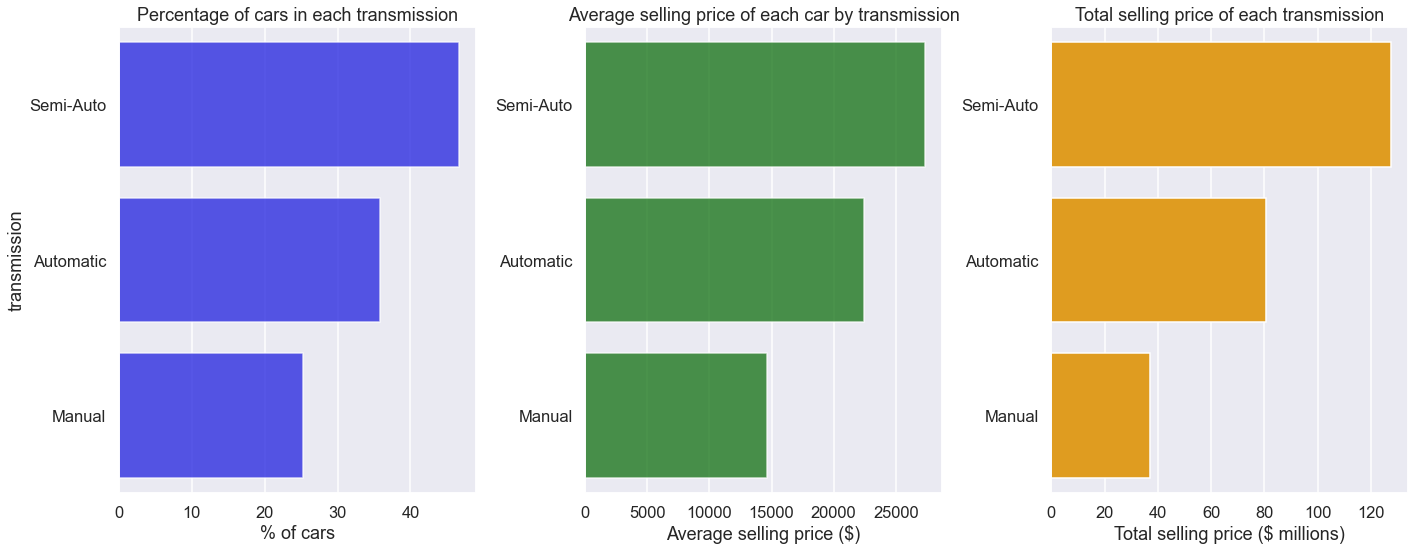

In [8]:
### Barplot: Percentage of cars, Average and Total selling price of cars by transmission
barplot_('transmission')

#### Observations:
- There are 3 different types of transmission type: Semi-auto, Automatic, Manual
- From the above barplots, it's clear that the dataset contains most amount of data about the Semi-auto cars (47%)
- If we look at the average selling price of a car by transmission type, Semi-auto cars have the largest selling price.
- Total selling price of Semi-auto cars \\$127.6M, Automatic \\$80.4M, and Manual \\$37M

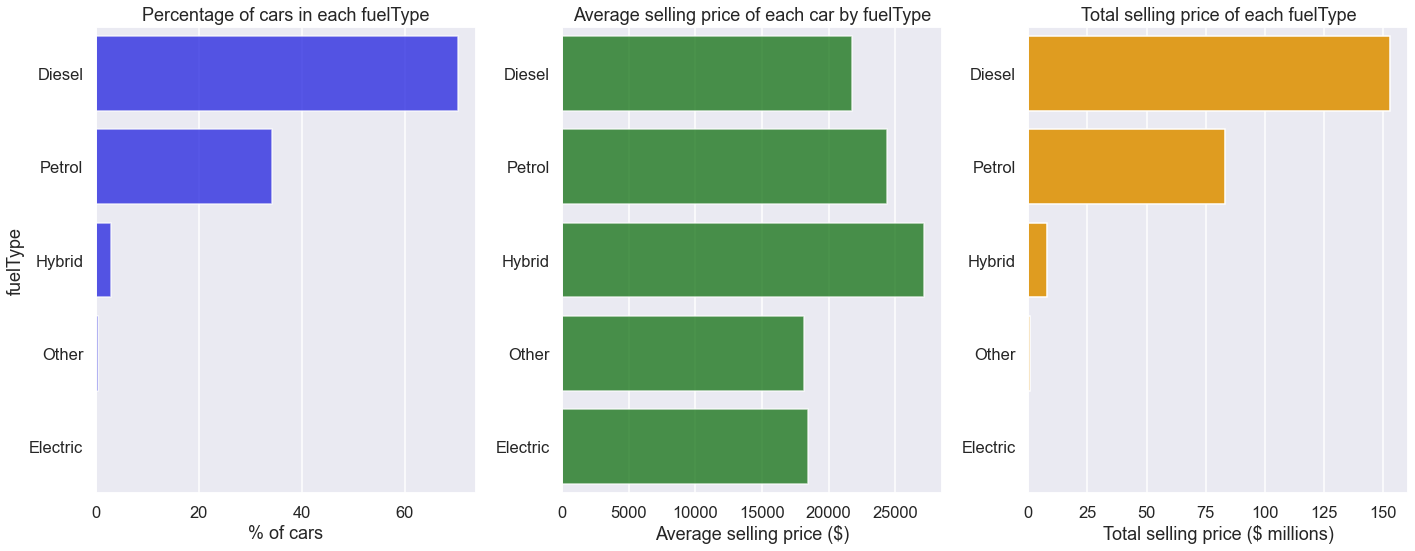

In [9]:
### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType
barplot_('fuelType')

#### Observations:
- In this datset, most of the BMW cars are Diesel based and second highest Petrol (34%)
- Average price of a Hybrid car is greater than other fuel types
- Total selling price of cars by fuelType: Diesel based cars \\$153M, and Petrol based cars \\$83M

In [48]:
# separate the numeric columns
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

### Distribution of the features and target variable for different transmission and fuel type

#### Assumption: 
- **The features are normally distributed and Linear models will perform best to predict the resale price**

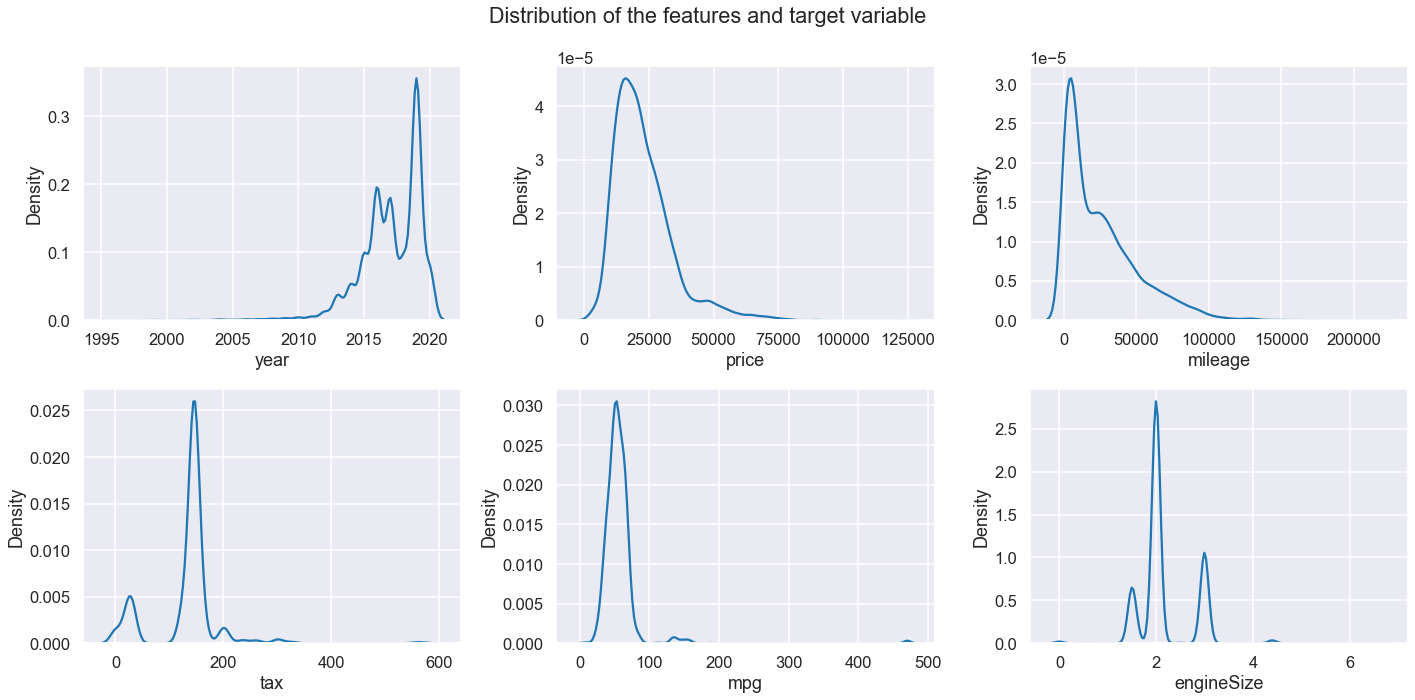

In [12]:
# Distribution of the features and target variable for different transmission
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, common_norm=True)

plt.suptitle("Distribution of the features and target variable")
plt.tight_layout()
plt.show()

#### Observations:
From the above distribution plots, it's clear that the given features are not normally distributed. So, the assumption **"The features are normally distributed"** is not true. Distribution of the features and target variable are skewed.

So, I need to perform data transformation before applying linear models or I can apply ensemble learning, where normally distributed features are not mandatory.

#### Scatterplot and residualplot of the features and target variable 'price'

#### Questions in mind:
- Can we fit each individual feature linearly with the target variable 'price'?

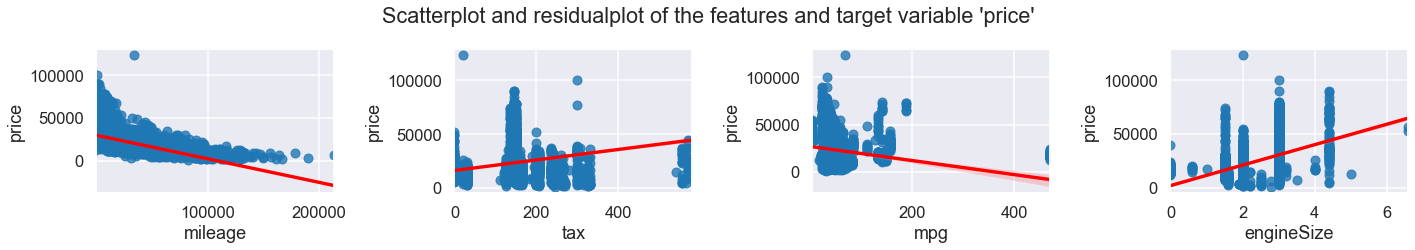

In [13]:
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize']

target = 'price'

plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    # scatterplot with the regression line
    plt.subplot(4,4,i+1)
    sns.regplot(x=numeric_features[i], y=target, data=df, line_kws={"color": "red"})
    
plt.suptitle("Scatterplot and residualplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

#### Observations:

If we try to fit each feature with the target variable 'price', we can see that, we can't fit them linearly: can't fit the feature and target in a straight line. 

So, the assumption **Linear models will perform best to predict the resale price** is not true.

#### Outlier removal

#### Question in mind: 
- What's the mpg of the electric cars?

In [49]:
df[df['fuelType'] == 'Electric']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8375,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
8400,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
8835,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


#### Observations:
The dataset contains only 3 electric vehicles of i3 model. All have the same mpg 470.8
<br>As the number of samples for the electric vehicle is very low, I will remove these cars

#### Question in mind: 
- What's the mpg of the bmw cars?
<br> mpg for the bmw cars can't be more than 125 [1], that means 'mpg' columns contain outliers.

**reference:** [1] https://www.southbaybmw.com/most-fuel-efficient-bmw-available-near-long-beach-ca.htm#:~:text=The%20new%202019%20BMW%203,return%20over%2030%20highway%20mpg.

**Assumption: 'mpg' > 150 are outliers**

In [50]:
# removing the outliers
df = df[df['mpg'] <= 150]

print(df.shape)

(10686, 9)


#### Observations:
Number of rows after outlier removal  = 10686
<br>Number of rows before outlier removal = 10781

So, number of outliers removed = 10781 - 10686 = 95

### Correlation Heatmap

**Assumptions:**
- **Car price increases when engineSize increases:** 
- **Car price increases when mpg increases:** 
- **Car price decreases when the mileage increases:** 
- **When the engineSize increases, the mpg decreases:**
- **Car price increases with the latest year cars**

In [51]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): correlation among the variables
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (10,10))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', annot=True, mask = mask) 
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

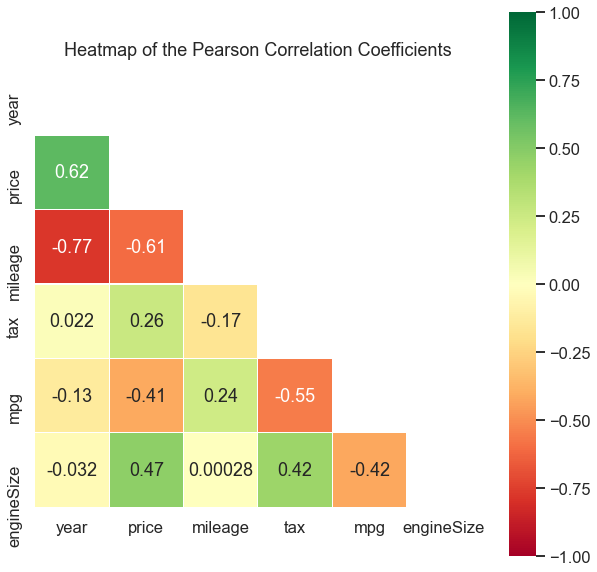

In [52]:
# set the background of the images
sns.set_style('whitegrid')

correlation_heatmap(df[numeric_cols])

**Observations:**
- **Car price increases when engineSize increases:** True. Car price has a positive correlation (0.47) with the engineSize
- **Car price increases when mpg increases:** False. Car price has a negative correlation (-0.41) with the mpg. That's quite opposite to what I was thinking- A good car should have high mpg
- **Car price decreases when the mileage increases:** True. Car price has a negative correlation (-0.61) with the mileage
- **When the engineSize increases, the mpg decreases:** True. mpg has a negative correlation (-0.42) with the engineSize
- **Car price increases with the latest year cars**: True. car price has a positive correlation (0.62) with the year
- Road tax increases when the engineSize increases. Road tax has a positive correlation (0.42) with the engineSize

In [53]:
# separate the training features
X = df.drop(['price'], axis=1)

# seprate the target variable
target = df[['price']]

#### Data Transformation

In [54]:
# numeric features
numeric_cols = X.select_dtypes(include='number').columns
print(numeric_cols)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


We already know that our features are not normally distributed. A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as stabilizing the variance of the distribution.

References: 
<br>[2] https://machinelearningmastery.com/power-transforms-with-scikit-learn/
<br>[3] https://medium.com/@josecacho/how-to-use-powertransformer-to-improve-model-performance-e62357fb4df8

In [55]:
scale = PowerTransformer()

# using a loop to standardize only the numeric columns
for col in numeric_cols:
    X[col] = scale.fit_transform(X[[col]])

display(X.head())
# display(X.describe())

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,-1.342833,Automatic,1.376034,Diesel,-0.076490,0.346900,-0.248848
1,6 Series,0.387343,Automatic,-0.083649,Petrol,0.241080,-0.758725,-0.248848
2,5 Series,-0.497436,Automatic,1.295717,Diesel,0.475549,-0.081679,1.483336
3,1 Series,-0.060080,Automatic,0.398395,Diesel,0.241080,1.224749,-1.425559
4,7 Series,-1.342833,Automatic,0.779354,Diesel,0.475549,-0.155037,1.483336


#### One-hot encoding

In [56]:
# one-hot encoding of the categorical features
X = pd.get_dummies(X)

# Let's check the data
display(X.head())
# display(X.info())

,year,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-1.342833,1.376034,-0.076490,0.346900,-0.248848,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0.387343,-0.083649,0.241080,-0.758725,-0.248848,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.497436,1.295717,0.475549,-0.081679,1.483336,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,-0.060080,0.398395,0.241080,1.224749,-1.425559,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,-1.342833,0.779354,0.475549,-0.155037,1.483336,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


Before one-hot encoding, there were 12 features. 
<br>After one-hot encoding, there are 35 features.

#### Splitting the data for training and testing

In [22]:
# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (8548, 35)
y_train : (8548, 1)
X_test : (2138, 35)
y_test : (2138, 1)


#### Linear Regression

In [23]:
# using statsmodel for the training
model_LR = sm.OLS(y_train, X_train)
result_LR = model_LR.fit()
print(result_LR.summary())

# prediction
y_pred_LR = result_LR.predict(X_test)

# mean absolute error
MAE_LR = mean_absolute_error(y_test, y_pred_LR)

# root mean squared error
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# coefficient of determination
r2_LR = r2_score(y_test, y_pred_LR)

print("For the test set,")
print("MAE : ", MAE_LR, "RMSE : ", RMSE_LR, "r2_score :", r2_LR)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     2182.
Date:                Mon, 14 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:02:10   Log-Likelihood:                -82494.
No. Observations:                8548   AIC:                         1.651e+05
Df Residuals:                    8515   BIC:                         1.653e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                    3761

**Null hypothesis: There is no relationship between the feature and the target variable.** That means the coefficient of the feature variable will be 0.
<br>When p-value < 0.05 for a feature, we can reject the null hypothesis, which means that the feature has a relation with the target variable.

When p-value > 0.05, we can't reject the null hypothesis that means there is not relationship between the feature and the target variable

All features of p-value<0.05 are important here.

<br>For the test set, MAE and RMSE are very high for the Linear Regression model and r2_score is also low. So, we'll now move to ensemble learning.

#### Function for saving the Cross-validation results

In [24]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    cross_val_result = cross_val_result.sort_values(by='rank_test_score')
    
    # return a dataframe
    return cross_val_result

#### Function for Prediction and Key Performance Indicators

In [25]:
def model_output(X_test, y_test, model):
    """
    Args:
        X_test (dataFrame): testset features
        y_test (dataFrame): testset target variable
        model : trained model
    Returns:
        cv (dataFrame): cross-validation results
        y_pred (List[float]): predicted values
        MAE (float): Mean Absolute Error
        RMSE (float): Root Mean Squared Error
        r2 (float): R squared
    """
    
    # print the best hyperparameters after the grid search
    print("best hyperparameters :", model.best_params_)
    
    # save the cv results in a dataFrame by rank
    print("Cross-Validation results: ")
    cv = cv_result(model)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)
    
    # KPI for the test set
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = np.round(r2_score(y_test, y_pred), 2)
    
    display(cv.head())
    print("For the test set, MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

#### Function for Machine Learning Algorithms with grid search

In [26]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

def X_gradient_boosting_regressor(x, y, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Gradient Boosting regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        max_depth (list[int]): Maximum depth of the individual regression estimators
        n_estimators (list[int]): The number of boosting stages to perform
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = xgb.XGBRegressor(random_state=42)

    # Hyperparameters
    parameters = {'max_depth': max_depth,
                  'n_estimators': n_estimators,
                  'learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

#### Extreme Gradient Boosting

In [27]:
model_XGB = X_gradient_boosting_regressor(X_train, y_train,
                                          np.arange(6,10,1).tolist(),  
                                          np.arange(200,401,100).tolist(), 
                                          [0.1],
                                          'neg_mean_absolute_error', 
                                          10)

runtime =  9.0 mins


In [29]:
cv_XGB, y_pred_XGB, MAE_XGB, RMSE_XGB, r2_XGB = model_output(X_test, y_test, model_XGB)

best hyperparameters : {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Cross-Validation results: 


,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
9,0.1,9,200,-1605.577280,-1461.375929,-1550.422001,-1506.179078,-1452.870794,-1443.484957,-1502.179135,-1424.747407,-1364.043499,-1577.324493,-1488.820457,70.367023,1
4,0.1,7,300,-1614.078646,-1444.500905,-1497.408053,-1511.515990,-1454.823575,-1464.868414,-1513.139055,-1429.433021,-1406.464298,-1558.121116,-1489.435307,59.725839,2
5,0.1,7,400,-1612.563859,-1447.725394,-1504.133846,-1518.604203,-1456.399053,-1466.239815,-1507.988934,-1435.587477,-1404.543015,-1545.335863,-1489.912146,57.593211,3
6,0.1,8,200,-1636.249379,-1448.279610,-1519.253532,-1480.814952,-1446.142008,-1457.913446,-1518.634697,-1436.351434,-1391.803870,-1566.728589,-1490.217152,68.007408,4
7,0.1,8,300,-1626.366329,-1453.787645,-1518.096789,-1493.948516,-1454.207247,-1456.961575,-1515.483603,-1439.819491,-1388.957416,-1555.273745,-1490.290236,63.813564,5


For the test set, MAE :  1448.63 RMSE :  2333.38 r2_score : 0.96


#### Observations:
The above dataframe represents the top 5 cross-validation results from the Extreme Gradient Boosting regressor with hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 1488.82 and 
<br>In the test set, the mean absolute error (MAE) is 1448.63
<br>That means the model performance has improved in the test set

For the test set,
- MAE of XGB (1448.63) < MAE of Linear Regression (2507.56)
- RMSE of XGB (2333.38) < RMSE of Linear Regression (3581.96)
- R squared of XGB (0.96) > R squared of Linear Regression (0.9)

In [42]:
# let's create a new dataFrame with the actual and predicted prices
output = y_test.copy()

output['XGB_predicted_price'] = y_pred_XGB

# find the absolute error for the best two models
output['XGB_abs_err'] = np.abs(output['price']-output['XGB_predicted_price'])

print("5 examples when the actual price and predicted price using XGB are less than $100:")
display(output[output['XGB_abs_err'] < 50].tail())

5 examples when the actual price and predicted price using XGB are less than $100:


,price,XGB_predicted_price,XGB_abs_err
7344,6500,6545.660156,45.660156
6229,10999,11038.719727,39.719727
9335,15989,15998.110352,9.110352
4624,14500,14531.549805,31.549805
9270,7990,8027.790039,37.790039


#### How good is the XGB predictions?

In [43]:
# Let's check the summary statistics of the absolute errors of the best two models
output[['XGB_abs_err']].describe()

,XGB_abs_err
count,2138.000000
mean,1448.630245
std,1829.671912
min,0.650391
25%,436.072510
50%,937.259766
75%,1763.002197
max,31048.789062


25% of the predictions are within \\$0 to \\$436 lower or higher than the actual price
<br>50% of the predictions are within \\$0 to \\$937 lower or higher than the actual price
<br>75% of the predictions are within \\$0 to \\$1763 lower or higher than the actual price

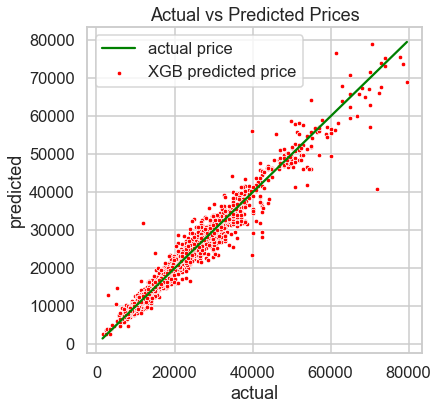

In [58]:
plt.figure(figsize=(6,6))

sns.lineplot(x='price', y='price', data=output, label='actual price', color='green')
sns.scatterplot(y='XGB_predicted_price', x='price', data=output, color='red', marker=".", label='XGB predicted price')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Actual vs Predicted Prices")
plt.show()

- When Car price < \\$40,000, predicted prices are close to the actual prices. 
- When Car price > \\$40,000, predicted prices went away from the actual prices. 
That means, the XGB model performs better for the car price below \\$40,000

#### Goal 1: Finding the best features

In [44]:
def feature_importance(model, x, regressor_algorithm):
    # find the important features
    importances = model.best_estimator_.feature_importances_

    # Sort importances
    sorted_index = np.argsort(importances)

    # Create labels
    labels = x.columns[sorted_index]

    # Create plot
    _ = plt.barh(range(x.shape[1]), importances[sorted_index], tick_label=labels)
    _ = plt.title("feature importance for " + regressor_algorithm)
    _ = plt.xlabel("feature importance")

    return _

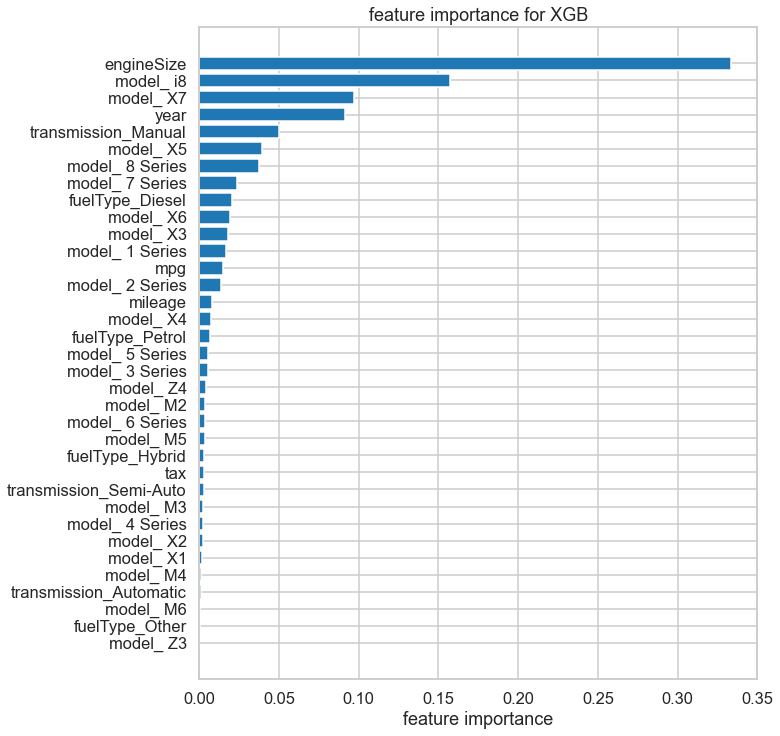

In [45]:
# feature importance for XGB
plt.figure(figsize=(10,12))
feature_importance(model_XGB, X_train, 'XGB')
plt.show()

As the first goal of this project is to **find the important features to predict the resale price of BMW used cars.**

**Best features:** Based on the XGB model, the important features are:
- **'engineSize'** has the highest feature importance to predict the price of a car. As far as we know, the lower the engine size provides better mpg. From the correlation plot, 'engineSize' has the second-highest positive correlation with the target variable price.
- **'year'** is the second-highest important feature, which is true. The more latest the car, the more expensive it is. From the correlation plot, **'year'** has the highest positive correlation with the target variable price.
- **manual transmission** is an important feature. From the initial exploratory data analysis, Manual transmission cars are cheaper than automatic or semi-auto cars. From the actual vs predicted prices plot, the XGB models predicted quite well for the lower-priced cars.
- **model X7**, **8 Series** cars got high importance. These two car models have the highest mean price in the dataset.


The second goal of this project is to **design a best-supervised regression model to predict the resale price with the lowest prediction error and evaluate the machine learning model with 3 key performance indicators such as Mean Absolute Error (MAE), Root-mean squared error (RMSE) and coefficient of determination (R-squared).**

**Recommended Machine Learning model:** XGB. Nearly 1450 MAE, 2333.38 RMSE and 0.96 R-squared kpi for the model performance is quite good. If you look at the used car prices at Facebook Marketplace and the estimated value of the similar cars in Kelly Bluebook or carfax, based on my observations, they usually vary from \\$1000 - \\$1500.


#### Future work:
1. Feature importance can be calculated by two other methods. Permutation Based Feature Importance method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one. Another method to compute feature importance in Xgboost is to use SHAP package. It is model-agnostic and using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.
1. We can train the dataset for individual car model. Training by specific car models may lower the prediction error because the trained model will learn only the specific features of that particular car model.
2. We can train the dataset by Neural Networks to reduce the MAE, RMSE and improve the r-squared value.
3. In order to make the prediction more accurate, I can suggest adding few new features in the dataset such as accident history, car's internal and exterior condition, car title (clean, rebuilt, salvage etc.), color, location, etc.